In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

from scipy import stats

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.decomposition import PCA

In [2]:
df_concrete= pd.read_csv('concrete (1).csv')

In [3]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
df_concrete.shape

(1030, 9)

In [5]:
df_concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df_concrete.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
df_concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


###### Observation:<br>
1) The data set contains 1030 rows and 8 columns.<br>
2) All the columns are uniform distribution except age column.<br>
3) slag, ash and superplastic columns looks highly spreadout with min zero, 1st and 2nd Quirtile almost zero.<br>
4) The data has no null or na values.<br>

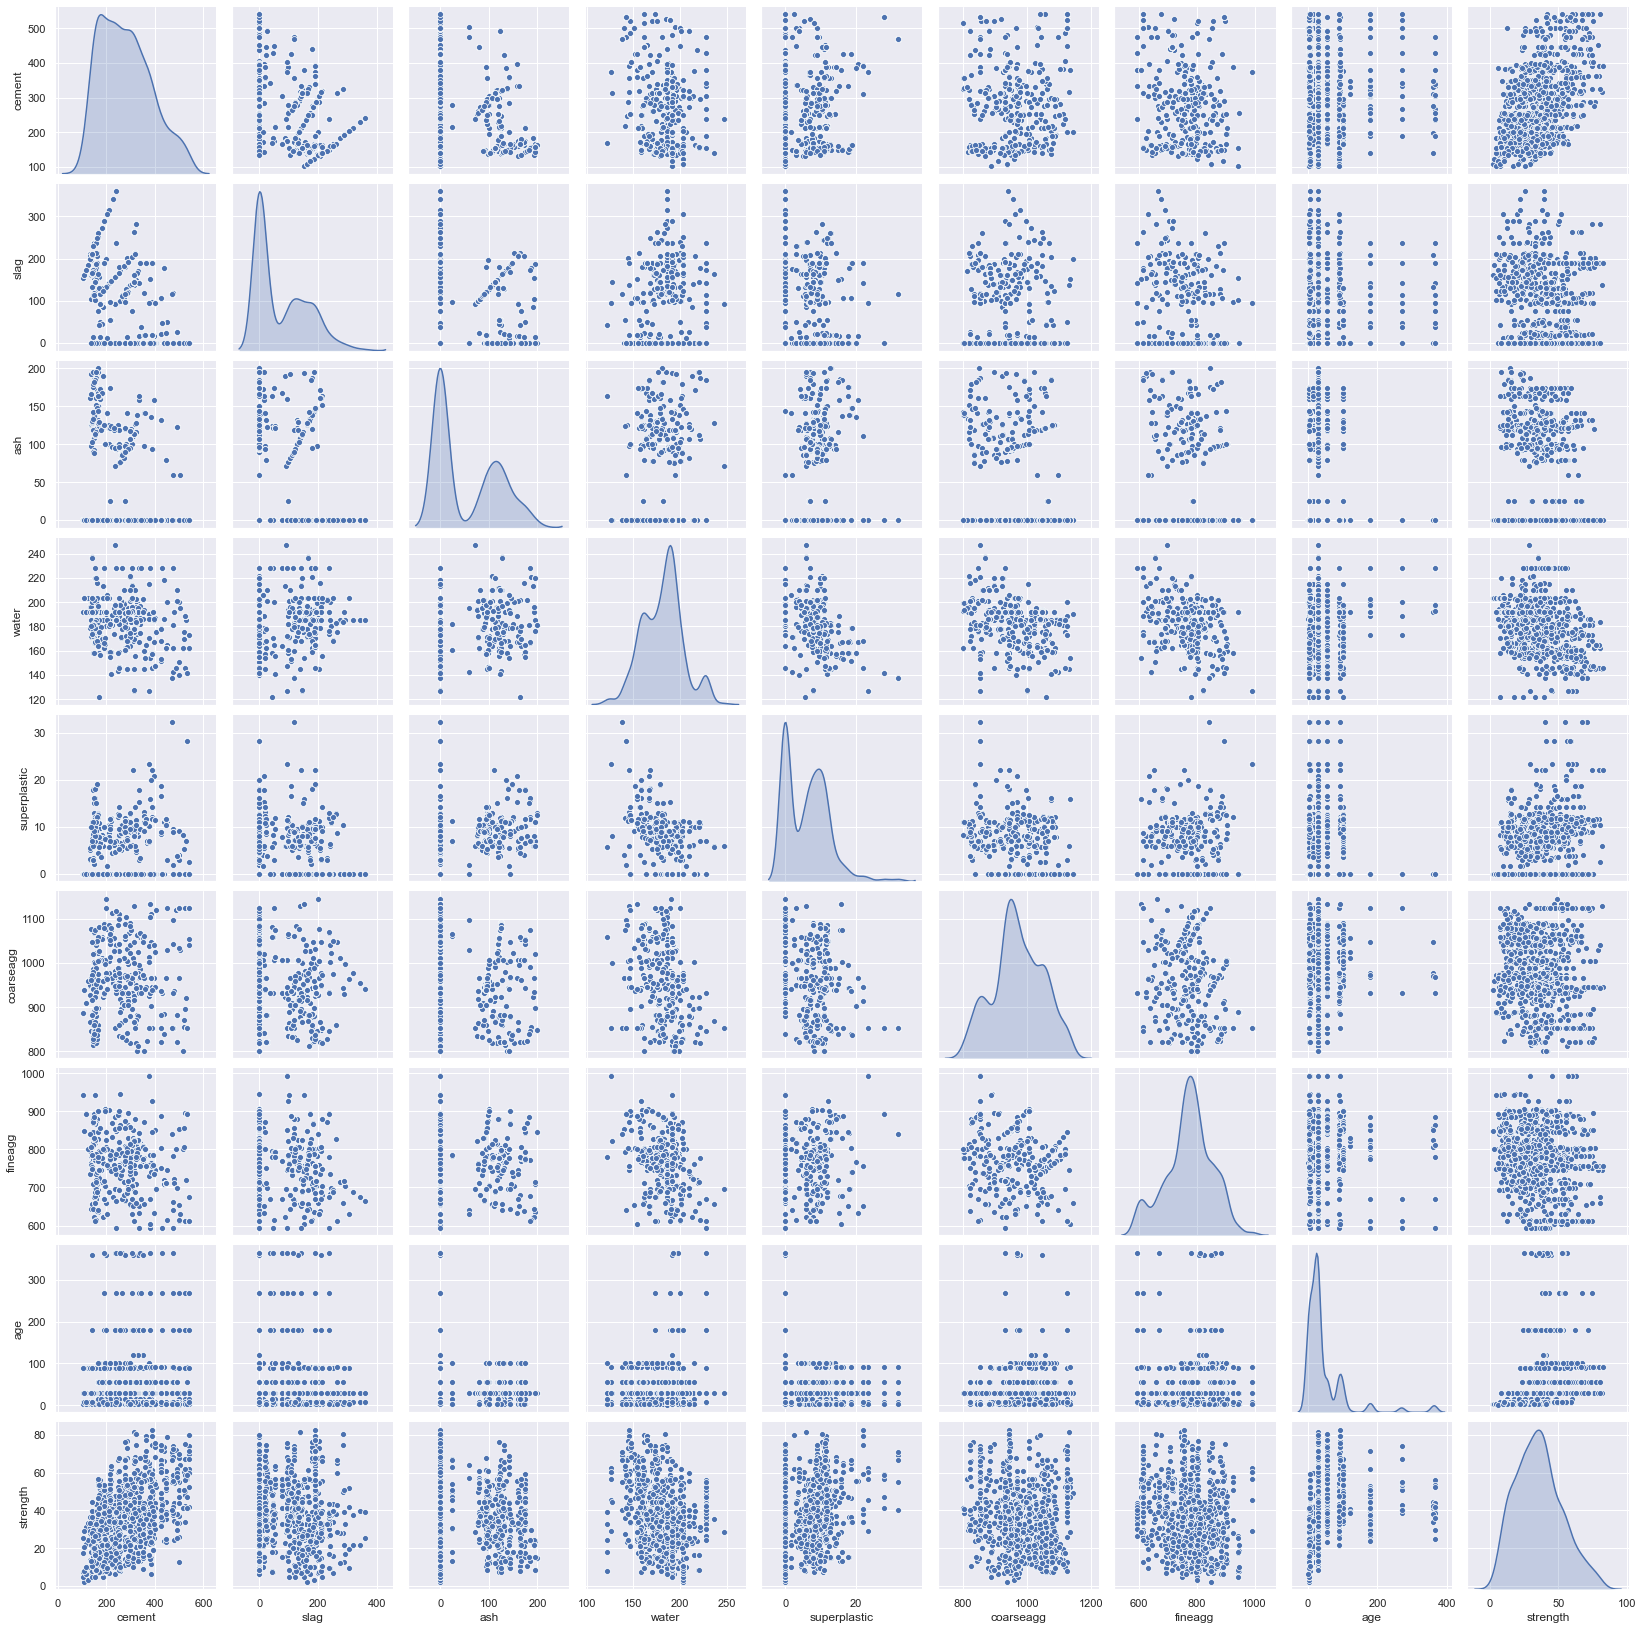

In [8]:
sns.pairplot(df_concrete,diag_kind='kde')

###### Observation :
1) There is no fixed ratio and proportion of input variables to achive the higher strength.<br>
2) We can also see that, we need to maintain the ratios of multiple ingredients to achieve the same strength.<br>
   For example: Ratio of ash and water(for more ash we require more water), water and superplastic.<br>
3) we can see that ash vs slag follows a linear relation, that means they have multi-colinearity relation among them.<br>
4) We can also observe multiple Gaussian distributions for all columns except cement and Strength. This also indicates the          presence of outliers.<br>
5) Scaling : Looks fine as we can see the input parameters with outliers and we have independent variables in same units.

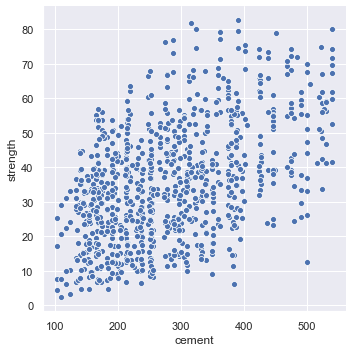

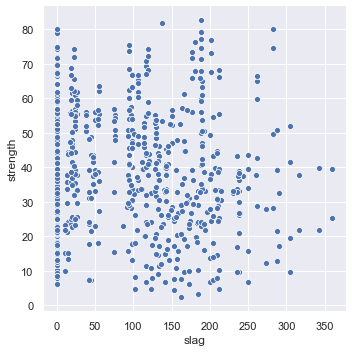

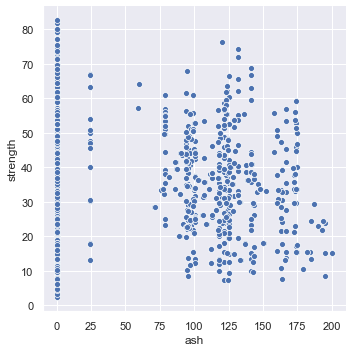

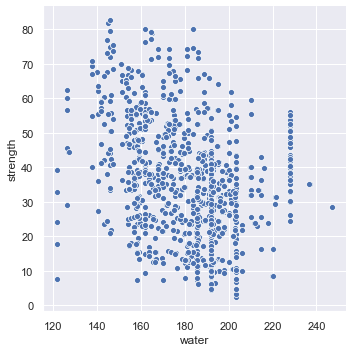

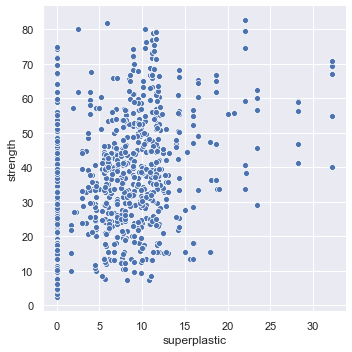

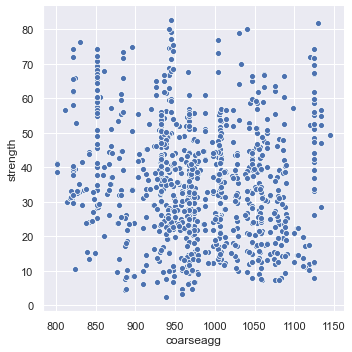

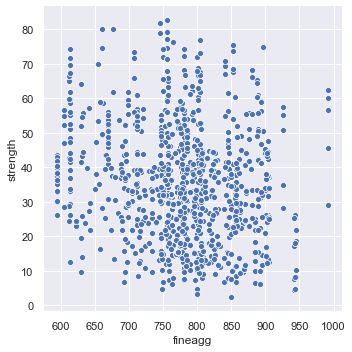

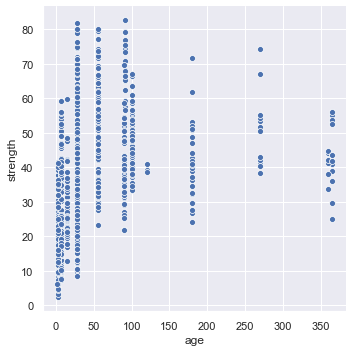

In [9]:
sns.relplot(x="cement", y="strength",  data=df_concrete);
sns.relplot(x="slag", y="strength",  data=df_concrete);
sns.relplot(x="ash", y="strength",  data=df_concrete);
sns.relplot(x="water", y="strength",  data=df_concrete);
sns.relplot(x="superplastic", y="strength",  data=df_concrete);
sns.relplot(x="coarseagg", y="strength",  data=df_concrete);
sns.relplot(x="fineagg", y="strength",  data=df_concrete);
sns.relplot(x="age", y="strength",  data=df_concrete);

From the graph we can observe that only cement and superplastic indicate a positive relation with the target column strength

In [10]:
df_concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


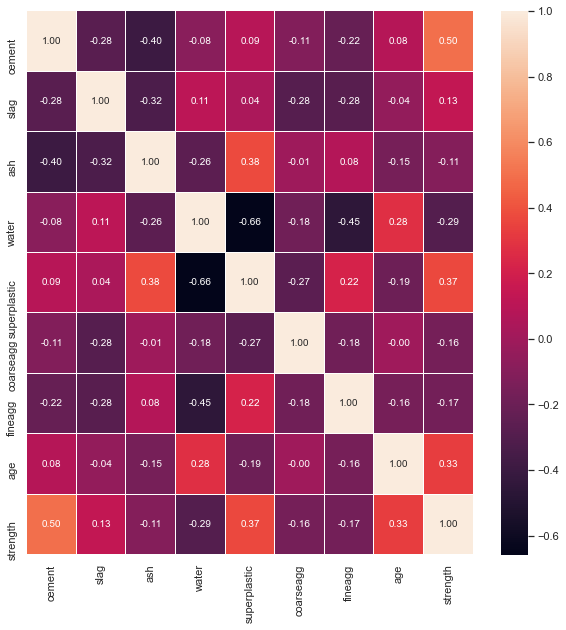

In [11]:
corr=df_concrete.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True,linewidth=0.05,ax=ax, fmt= '.2f');

###### Observation:<br>
1) ash, water, coarseagg and fineagg have -ve correlation with cement and strength.<br>
2) slag has -ve corr with cement.<br>
3) Strength has +ve with Cement, superplastic and age. Although the correlation with cement is high as compared to other 2.<br>
4) Strength has -ve with Water


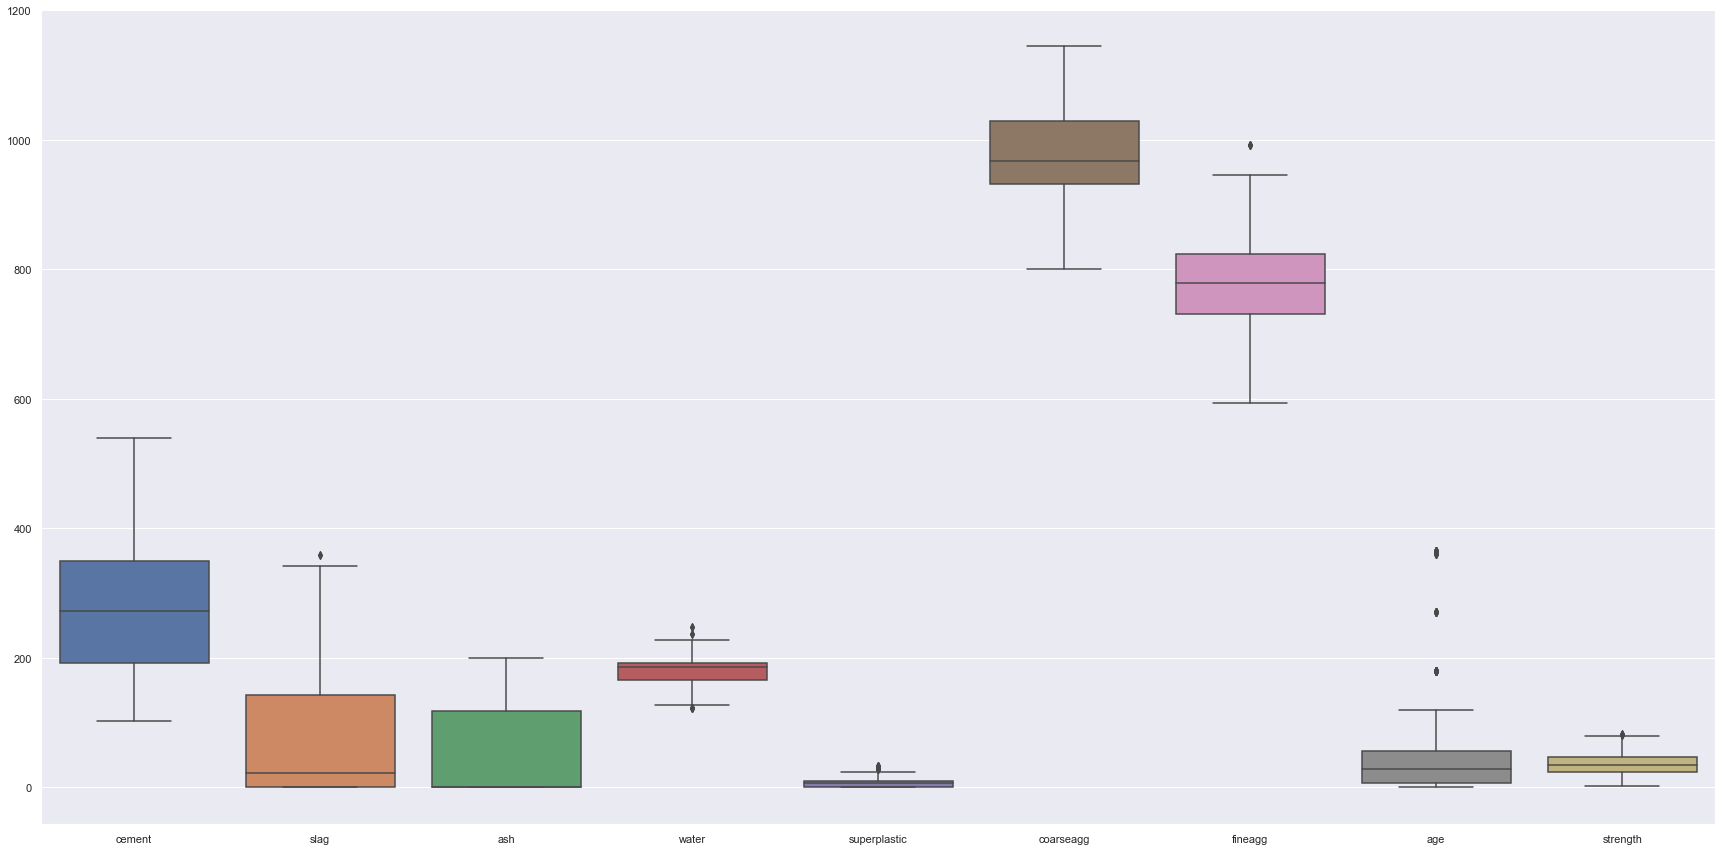

In [12]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df_concrete)

###### Observation:<br>
Looks like there are not much outliers but age,water, slag and superplastic surely have some outlier. If these belong to feature importance we have to take care of it. There are data for slag and ash also looks quite right skewed as we have analysed earlier

In [13]:
corrMatrix = df_concrete[df_concrete.columns[0:]].corr()['strength'][:-1]
corrMatrix = corrMatrix.to_frame()

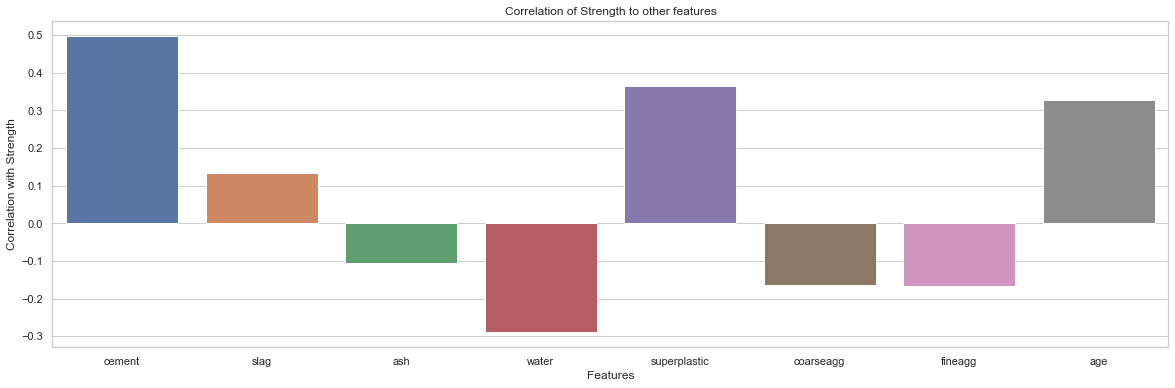

,strength
cement,0.497832
slag,0.134829
ash,-0.105755
water,-0.289633
superplastic,0.366079
coarseagg,-0.164935
fineagg,-0.167241
age,0.328873


In [14]:
plt.figure(1,figsize =(20,6))
sns.set(style="whitegrid")
sns.barplot(x = corrMatrix.index,y = corrMatrix['strength'],data = corrMatrix)
plt.title('Correlation of Strength to other features')
plt.ylabel('Correlation with Strength')
plt.xlabel('Features')
plt.show()
corrMatrix

We can observe cement, slag, superplastic and age has positive effect on strength

In [15]:
df_concrete.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

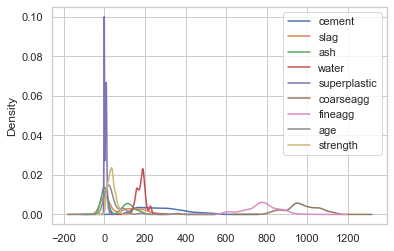

In [16]:
df_concrete.plot.kde()

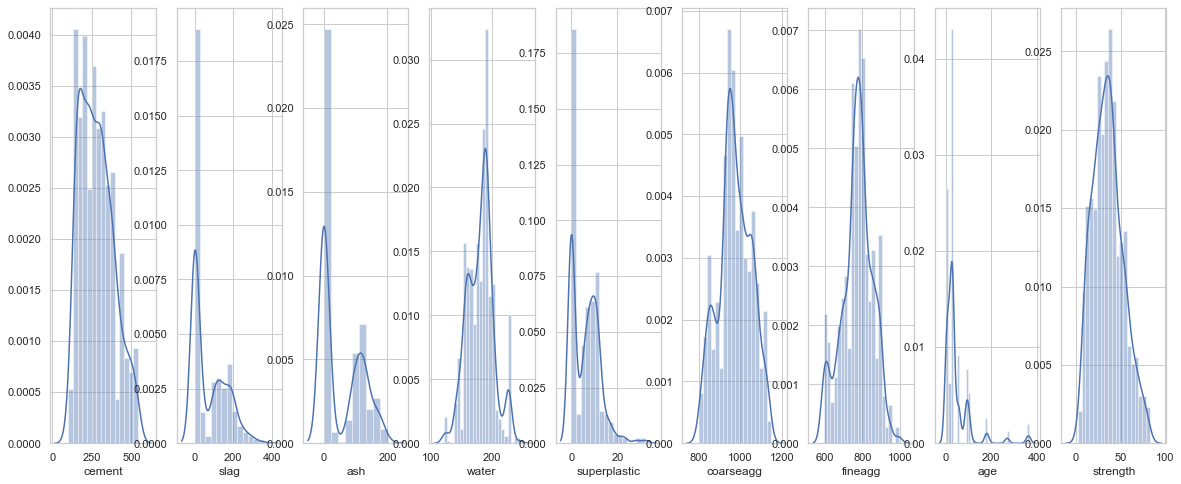

In [17]:
fig, ax = plt.subplots(1,9,figsize=(20,8)) 
sns.distplot(df_concrete.cement,ax=ax[0])
sns.distplot(df_concrete.slag,ax=ax[1])
sns.distplot(df_concrete.ash,ax=ax[2])
sns.distplot(df_concrete.water,ax=ax[3])
sns.distplot(df_concrete.superplastic,ax=ax[4])
sns.distplot(df_concrete.coarseagg,ax=ax[5])
sns.distplot(df_concrete.fineagg,ax=ax[6])
sns.distplot(df_concrete.age,ax=ax[7])
sns.distplot(df_concrete.strength,ax=ax[8])

###### Observation:<br>
1) cement column is almost normally distributed.<br>
2) slag, ash, superplastic and fineagg column has 2 Gaussian and is skewed to right. This skeweness indicate presence of outlier.<br>
3) water column has 3 Gaussian. and is skewed to left. This skeweness indicate presence of outlier.<br>
4) coarseagg column has 2 Gaussian, but it doesn't have any skeweness hence no outliers.<br>
5) age column has 5 Gaussian and is skewed to right. This skeweness indicate presence of outlier.<br>
6) strength column is almost normally distributed with a slight skeweness on the right.This skeweness indicate presence of outlier.<br>

In [18]:
# Replacing outliers
outliers =  []
zscore = df_concrete.apply(stats.zscore)

df_concrete_columns = df_concrete.columns.values
for key, value in zscore.iteritems():
    row=0
    medianV = np.median(df_concrete[[key]])
    columnnum = df_concrete.columns.get_loc(key)
    for v in value:
        if v>3 or v < -3 :
            outliers.append(v)
            df_concrete.iloc[row,columnnum] = medianV
            print (df_concrete.iloc[row,columnnum] )
        row = row + 1
     

print("outlier size ", len(outliers))

22.0
22.0
22.0
22.0
185.0
185.0
6.4
6.4
6.4
6.4
6.4
6.4
6.4
6.4
6.4
6.4
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
28.0
outlier size  49


Exploring the clusters options based on the number of gaussian determined abaove

In [19]:
df2=df_concrete.copy()

In [20]:
df_concrete_cluster = range( 2, 6 ) #as the min and max number of gaussian determined is 2 and 5 respec.
errors = []
for num in df_concrete_cluster:
  clusters = KMeans( num, n_init = 5)
  clusters.fit(df2)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  errors.append( clusters.inertia_ )
df_cluster = pd.DataFrame( { "num":df_concrete_cluster, "cluster_errors": errors } )
df_cluster[0:5]

,num,cluster_errors
0,2,2.848442e+07
1,3,2.224436e+07
2,4,1.942383e+07
3,5,1.731041e+07


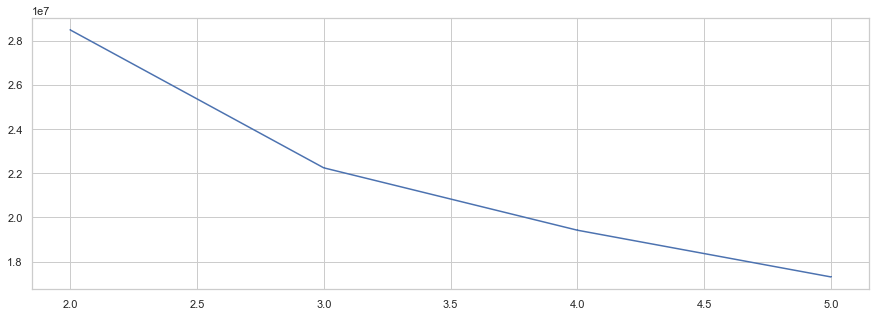

In [21]:
plt.figure(figsize=(15,5))
plt.plot( df_cluster.num, errors, marker = "," )

the number of clusters best for analysis is 3

In [22]:
df2_scaled = df2.apply(stats.zscore)

df2_cluster = KMeans( n_clusters = 3, random_state = 1 )
df2_cluster.fit(df2_scaled)

pred=df2_cluster.predict(df2_scaled)
df2_scaled["GROUP"] = pred 

centers = df2_cluster.cluster_centers_
centers

array([[ 0.95146378,  0.51998064, -0.40333363, -0.85465855,  0.95895981,
        -0.65473861,  0.10300104, -0.08527429,  1.11554444],
       [ 0.06671499,  0.09274367, -0.80069902,  0.70574287, -0.94151755,
         0.25353277, -0.25949052,  0.06985509, -0.36118552],
       [-0.62734436, -0.40561389,  1.12732421, -0.29034624,  0.49266334,
         0.09776705,  0.22952024, -0.02834392, -0.24551265]])

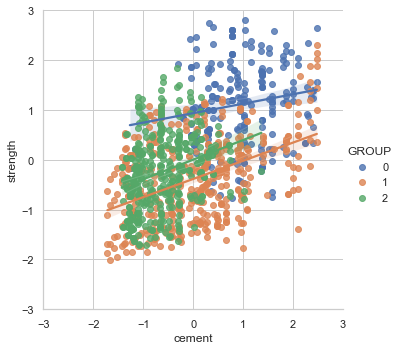

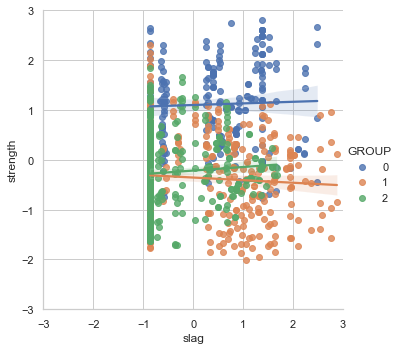

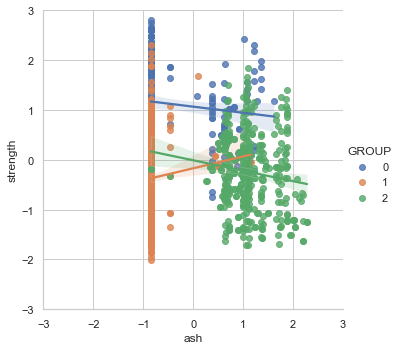

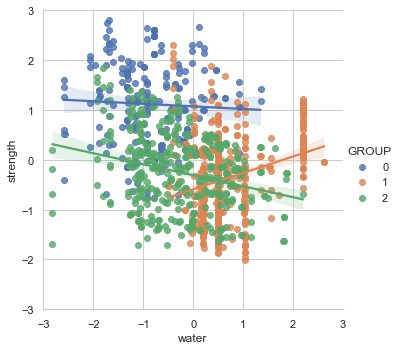

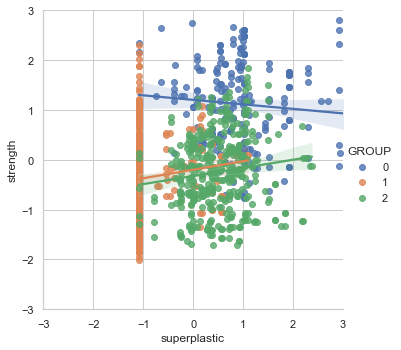

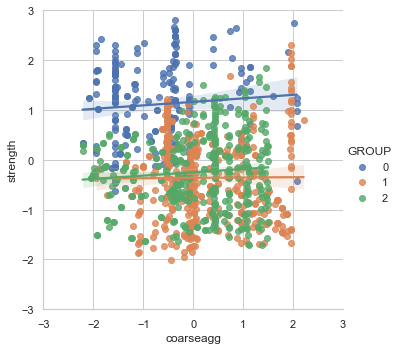

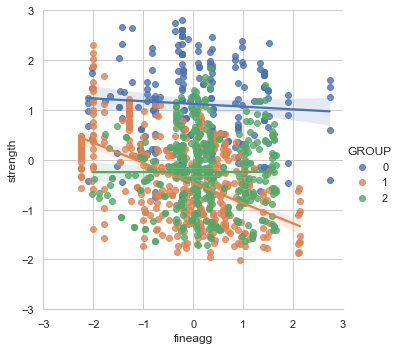

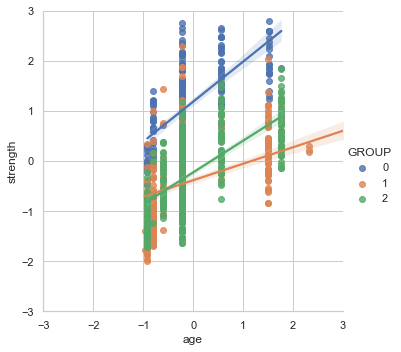

In [24]:
for i in range(0,len(df2_scaled.columns)-2):
    plot=sns.lmplot(df2_scaled.columns[i],'strength',data=df2_scaled,hue='GROUP')
    plot.set(xlim=(-3,3),ylim = (-3,3));

From the graph we can say that only age column can help us predict the strength for all 3 clusters. Rest other columns can't give right prediction for all 3 columns

In [25]:
X=df2_scaled.drop('strength',axis=1)
y = df2_scaled['strength']

In [26]:
# splitting the data into train and test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30,random_state=1)

#### Linear Regression

In [27]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [28]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[idx]))

intercept = reg_model.intercept_
intercept

The coefficient for cement is 0.6483539714481907
The coefficient for slag is 0.39235158687119154
The coefficient for ash is 0.2504612263070628
The coefficient for water is -0.15933549333825625
The coefficient for superplastic is 0.14439053058978762
The coefficient for coarseagg is 0.038429460622092404
The coefficient for fineagg is 0.01619866192419629
The coefficient for age is 0.46514612380609405
The coefficient for GROUP is -0.13448454272704188


0.15148497505882932

In [29]:
reg_model.score(X_train, y_train)

0.6680745261342076

In [30]:
reg_score=reg_model.score(X_test, y_test)
reg_score

0.6583457652858873

In [34]:
#reducing the dimensionality
pca = PCA(n_components=6)
pca.fit(df2_scaled.drop('strength',axis=1))
print(pca.components_)
print(pca.explained_variance_ratio_)
Xpca = pca.transform(df2_scaled.drop('strength',axis=1))
Ypca = df2_scaled['strength']

X_train_pca, X_test_pca, y_train_pca, y_test_pca=train_test_split(Xpca,Ypca,test_size=0.30,random_state=1)

[[-0.22958583 -0.22512983  0.51173539 -0.47290278  0.45989476  0.02989082
   0.37008582 -0.07981132  0.2353014 ]
 [ 0.44289835  0.22963    -0.28544123 -0.36237029  0.39634733 -0.37819987
   0.15137931 -0.09783776 -0.45355035]
 [ 0.52904862 -0.65270607 -0.12969282 -0.20433139 -0.14432096  0.43719425
   0.0619503   0.12404067 -0.0657231 ]
 [-0.05208902 -0.19070431 -0.06634398  0.18654875 -0.14830243 -0.45591981
   0.52265139  0.64632939  0.03088685]
 [ 0.26008676 -0.00266931  0.37209707  0.07789551  0.35778303 -0.11084797
  -0.60590988  0.52759113  0.04526216]
 [-0.2827271   0.39276557 -0.26322747 -0.36233691  0.04897574  0.52571117
   0.046312    0.52076047 -0.11452831]]
[0.26360429 0.19284277 0.16429223 0.11970126 0.11344978 0.10739893]


In [35]:
reg_model_pca = LinearRegression()
reg_model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

In [36]:
reg_model_pca.coef_

array([-0.02734356,  0.42623822,  0.14765629,  0.10773251,  0.51433862,
        0.24526302])

In [37]:
y_pred_pca = reg_model_pca.predict(X_test_pca)
reg_model_pca.score(X_train_pca, y_train_pca)

0.6417594743112007

In [38]:
pca_score = reg_model_pca.score(X_test_pca, y_test_pca)
pca_score

0.6400338950928515

#### Ridge Regression Model

In [39]:
ridge = Ridge(alpha=0.3)
ridge.fit(X_train,y_train)
print("Ridge model:",ridge.coef_)

Ridge model: [ 0.64556163  0.38971923  0.2481831  -0.16078127  0.14464667  0.0368352
  0.01411815  0.46488129 -0.13480013]


In [40]:
ridge.score(X_train,y_train)

0.6680731296094442

In [41]:
score_ridge = ridge.score(X_test,y_test)
score_ridge

0.6584996270077874

In [42]:
#### PCA
ridge_pca = Ridge(alpha=0.3)
ridge_pca.fit(X_train_pca,y_train_pca)

Ridge(alpha=0.3)

In [43]:
ridge_pca.score(X_train_pca,y_train_pca)

0.6417593849342873

In [44]:
score_ridge_PCA = ridge_pca.score(X_test_pca,y_test_pca)
score_ridge_PCA

0.6400356078782388

#### Lasso Regression Model

In [45]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print("Lasso Model",lasso.coef_)

Lasso Model [ 0.4364216   0.15937645  0.         -0.0902946   0.19434372 -0.
 -0.          0.33087634 -0.00560829]


In [46]:
lasso.score(X_train,y_train)

score_lasso = lasso.score(X_test,y_test)
score_lasso

0.5847772111487681

In [47]:
#### PCA
lasso_pca=Lasso(alpha=0.1)
lasso_pca.fit(X_train_pca,y_train_pca)

lasso_pca.score(X_train_pca,y_train_pca)

0.5939839548525677

In [48]:
score_lasso_PCA=lasso_pca.score(X_test_pca, y_test_pca)
score_lasso_PCA

0.6036271511080644

#### Decision Tree Regressor

In [49]:
dt_reg = DecisionTreeRegressor(random_state=1,max_depth=5)
dt_reg.fit(X_train, y_train)

feature_imp = dt_reg.feature_importances_
feature_names=X_train.columns
summary = {'Features' : feature_names,'Feature Importance' : feature_imp
          }
Feature_Importance_df = pd.DataFrame(summary)
Feature_Importance_df

,Features,Feature Importance
0,cement,0.108742
1,slag,0.019538
2,ash,0.000000
3,water,0.004181
4,superplastic,0.030240
5,coarseagg,0.022695
6,fineagg,0.040694
7,age,0.337135
8,GROUP,0.436776


In [50]:
y_pred_dt = dt_reg.predict(X_test)
score_DTR= dt_reg.score(X_test, y_test)
score_DTR

0.7570718069645539

In [51]:
#### PCA
dt_reg_pca = DecisionTreeRegressor(random_state=1,max_depth=5)
dt_reg_pca.fit(X_train_pca, y_train_pca)

y_pred_dt_pca = dt_reg_pca.predict(X_test_pca)
pca_score_dt = dt_reg_pca.score(X_test_pca, y_test_pca)
pca_score_dt

0.6088732679248984

#### Random Forest

In [52]:
model_rf = RandomForestRegressor() 

model_rf = model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_test)
score_RF = model_rf.score(X_test, y_test)
score_RF

0.902749286728845

In [53]:
#### PCA
model_rf_pca = RandomForestRegressor() 

model_rf_pca = model_rf_pca.fit(X_train_pca, y_train_pca)
y_predict_rf_pca = model_rf_pca.predict(X_test_pca)
score_RF_PCA = model_rf_pca.score(X_test_pca, y_test_pca)
score_RF_PCA

0.8425124169290471

#### Gradient Boost Regressor

In [54]:
Grad = GradientBoostingRegressor()

Grad_fit = Grad.fit(X_train, y_train)
y_predict_Grad = Grad.predict(X_test)

In [55]:
Grad.score(X_train , y_train)

0.9484437392375207

In [56]:
grad_score = Grad.score(X_test , y_test)
grad_score

0.8936369385650978

In [57]:
#### PCA
Grad_pca = GradientBoostingRegressor()

Grad_pca = Grad_pca.fit(X_train_pca, y_train_pca)
y_predict_Grad_pca = Grad_pca.predict(X_test_pca)
Grad_pca_score = Grad_pca.score(X_test_pca , y_test_pca)
Grad_pca_score

0.8138038918618499

####  (Tuning the model) 

In [58]:
scores = {'Scores': [reg_score, score_ridge,score_lasso, score_DTR,score_RF,grad_score],

                    'PCA Scores': [pca_score,score_ridge_PCA,score_lasso_PCA,pca_score_dt,score_RF_PCA,Grad_pca_score]
                     }

models=['Linear Regression','Ridge','Lasso','Decision Tree Regressor','Random Forest','Gradient Boost']
sum_df = pd.DataFrame(scores,models)

sum_df

,Scores,PCA Scores
Linear Regression,0.658346,0.640034
Ridge,0.658500,0.640036
Lasso,0.584777,0.603627
Decision Tree Regressor,0.757072,0.608873
Random Forest,0.902749,0.842512
Gradient Boost,0.893637,0.813804


###### Observation:<br>
Looking at the above table we can say that Random Forest model performs the best in  predicting the strength of high performance concrete.<br>
Also, we can notice that dimensionality reduction(considering 6 columns) leads to low score.

#### Techniques employed to squeeze that extra performance

In [59]:
rf_estimate = RandomForestRegressor() 
rf_estimate.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
search_grid={'n_estimators':[200, 400, 600, 800,1000,1200,1400],'max_depth':[10, 20, 30, 40, 50,60,70,80,90,100],'max_features': ['auto', 'sqrt'],'min_samples_leaf': [1, 2, 4],'min_samples_split': [2, 5, 10],'bootstrap': [True, False]}
search=GridSearchCV(estimator=rf_estimate,param_grid=search_grid,cv = 3, n_jobs = -1, verbose = 2)

In [67]:
search.fit(X_train,y_train)
search.best_params_

Fitting 3 folds for each of 2520 candidates, totalling 7560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 25.7min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 30.8min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 44.8min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 7560 out of 7560 | elapsed: 151.8min finished


{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

Best parameter model

In [68]:
rf_model = RandomForestRegressor(bootstrap= False, max_depth=20 ,max_features = 'sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators=600)

rf_model_fit = rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [69]:
rf_model.score(X_train , y_train)

0.9923678297180225

In [70]:
rf_model_score = rf_model.score(X_test , y_test)
rf_model_score

0.9015351604203891

###### Observation:<br>
1) Grid search help us in determining the best parameters for model selection.<br>

#### Model performance range at 95% confidence level

In [73]:
cl_score = cross_val_score(rf_model, X, y, cv=10)
cl_acc = cl_score.mean()
cl_std = cl_score.std()

print(scores)

{'Scores': [0.6583457652858873, 0.6584996270077874, 0.5847772111487681, 0.7570718069645539, 0.902749286728845, 0.8936369385650978], 'PCA Scores': [0.6400338950928515, 0.6400356078782388, 0.6036271511080644, 0.6088732679248984, 0.8425124169290471, 0.8138038918618499]}
